# Download file

In [7]:
!wget 'https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt'

--2018-12-07 16:46:17--  https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt
Resolving raw.githubusercontent.com... 151.101.20.133
Connecting to raw.githubusercontent.com|151.101.20.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760 [text/plain]
Saving to: `mini_classes.txt'

100%[======================================>] 760         --.-K/s   in 0s      

2018-12-07 16:46:17 (171 MB/s) - `mini_classes.txt' saved [760/760]



In [8]:
f = open("mini_classes.txt","r")
# And for reading use
classes = f.readlines()
f.close()

In [9]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]

In [12]:
from six.moves import urllib
def download():
    base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
    for c in classes:
        cls_url = c.replace('_', '%20')
        path = base+cls_url+'.npy'
        print(path)
        urllib.request.urlretrieve(path, 'data_all/'+c+'.npy')

In [13]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwatch.npy
https://storage.googleapis.com/quickdraw_dat

# CNN

In [42]:
def load_data(vfold_ratio=0.2, max_items_per_class= 5000 ):
    all_files = glob.glob(os.path.join("./data_all/", '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load a subset of the data to memory 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None

    #separate into training and testing 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    
#     print(x_train)
    return x_train, y_train, x_test, y_test, class_names

In [43]:
x_train, y_train, x_test, y_test, class_names = load_data()
num_classes = len(class_names)
image_size = 28

syringe


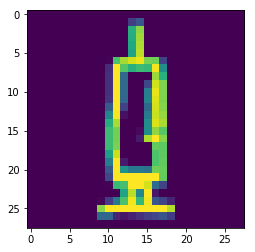

In [44]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [45]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.utils import np_utils
from keras.models import load_model

In [47]:
# Define model
model = Sequential()

model.add(layers.Convolution2D(filters=32, kernel_size=[5, 5], padding='same', 
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Convolution2D(filters=32, kernel_size=[5, 5], padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Convolution2D(filters=32, kernel_size = [5, 5], padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Convolution2D(filters=32, kernel_size=[5, 5], padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(units=500, activation='relu'))
model.add(layers.Dense(units=num_classes, activation='softmax'))

adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 32)          25632     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 32)          25632     
__________

In [49]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=34,
          verbose=2,
          validation_data=(x_test, y_test))

Train on 400000 samples, validate on 100000 samples
Epoch 1/34
18s - loss: 1.1245 - top_k_categorical_accuracy: 0.9078 - val_loss: 1.0217 - val_top_k_categorical_accuracy: 0.9187
Epoch 2/34
17s - loss: 0.9728 - top_k_categorical_accuracy: 0.9231 - val_loss: 0.9614 - val_top_k_categorical_accuracy: 0.9244
Epoch 3/34
17s - loss: 0.8943 - top_k_categorical_accuracy: 0.9309 - val_loss: 0.9413 - val_top_k_categorical_accuracy: 0.9274
Epoch 4/34
17s - loss: 0.8443 - top_k_categorical_accuracy: 0.9353 - val_loss: 0.8806 - val_top_k_categorical_accuracy: 0.9326
Epoch 5/34
17s - loss: 0.8098 - top_k_categorical_accuracy: 0.9389 - val_loss: 0.8587 - val_top_k_categorical_accuracy: 0.9336
Epoch 6/34
17s - loss: 0.7836 - top_k_categorical_accuracy: 0.9411 - val_loss: 0.8653 - val_top_k_categorical_accuracy: 0.9329
Epoch 7/34
17s - loss: 0.7611 - top_k_categorical_accuracy: 0.9432 - val_loss: 0.8325 - val_top_k_categorical_accuracy: 0.9360
Epoch 8/34
17s - loss: 0.7433 - top_k_categorical_accuracy:

In [50]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 93.24%
